# ngc6723 궁수자리 구상성단

## ngc6723 Introduction

**개요** 

NGC 6723은 궁수자리 방향 에 있는 구상성단 이다 . 크기는 6~6.8 사이이고, 지름은 7~11각분이다. 이 성단은 14등급의 별과 희미한 별들로 구성된 VII형 성단 입니다 . 궁수자리와 코로나 오스트랄리스 의 경계 근처에 있습니다 .

일반적인 구상 성단과 달리 NGC 6723은 금속성이 강화되어 있고 젊은 별이 많이 포함되어 있으며 원시별은 전체의 0.363 ± 0.017%에 불과합니다.

- 관측 정보
  + 적경: 18h 59m 33.15s
  + 적위: -36° 37’ 56.1”
  + 별자리: 궁수자리
- 물리적 성질
  + 형태: VII형 구상성단
  + 거리: 28,400 광년 (8,700 파섹)
  + 질량: $3.57 \times 10^5 M_{\odot}$
  + 겉보기 등급: 6.8


> [출처] https://en.wikipedia.org/wiki/NGC_6723
>
> [참고] https://people.smp.uq.edu.au/HolgerBaumgardt/globular/fits/ngc6723.html

##  Reference

- https://archive.stsci.edu/prepds/hugs/

- https://github.com/laingmic005/aperture-photometry/blob/main/L1_fits-handling.ipynb

- https://youtu.be/_DzSIeruotQ?si=ScAl1J5rSqyIt_ap


# 1. 데이터 전처리

In [1]:
import os

# 대상 폴더 경로 설정
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc6723'

# 폴더 내의 모든 파일 및 폴더 목록을 가져옴
files = os.listdir(folder_path)
list_files = []

# 모든 파일명 출력
for file in files:
    if file.endswith('.fits'):
        list_files.append(file)
        print(file)

hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits
hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits
hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits


In [2]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [3]:
import pandas as pd

# 열에서 보여주는 문자열의 최대 길이 설정 (예: 100)
pd.set_option('display.max_colwidth', 100)

list_files_df = pd.Series(list_files)

In [4]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth3.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_cmd.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_rgb.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits']

---

- hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits

- hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits

- hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits


위 3개의 파일을 활용

## 1.1 Fits 파일 불러오기

In [5]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Target filter는 275w, 336w, 438w 
print(list_files_df)

0    hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits
1    hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits
2    hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits
dtype: object


In [6]:
# fits 파일 열기 
fits_f275w = fits.open('HUGS/ngc6723/hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits')
fits_f336w = fits.open('HUGS/ngc6723/hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits')
fits_f438w = fits.open('HUGS/ngc6723/hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits')

In [7]:
print(fits_f275w)
print(fits_f336w)
print(fits_f438w)

In [8]:
# FITS 파일 안의 첫 번째 헤더 (Primary Header)에서 적경과 적위 정보 읽기
header_f275w = fits_f275w[0].header
header_f336w = fits_f336w[0].header
header_f438w = fits_f438w[0].header
 
ra_f275w = header_f275w['RA_TARG']  # 적경 정보
dec_f275w = header_f275w['DEC_TARG']  # 적위 정보

ra_f336w = header_f336w['RA_TARG']  # 적경 정보
dec_f336w = header_f336w['DEC_TARG']  # 적위 정보

ra_f438w = header_f438w['RA_TARG']  # 적경 정보
dec_f438w = header_f438w['DEC_TARG']  # 적위 정보


# 정보 출력
print(f'Right Ascension of fits_f275w (RA): {ra_f275w}')
print(f'Declination of fits_f275w (Dec): {dec_f275w}')

print(f'Right Ascension of fits_f336w (RA): {ra_f336w}')
print(f'Declination of fits_f336w (Dec): {dec_f336w}')

print(f'Right Ascension of fits_f438w (RA): {ra_f438w}')
print(f'Declination of fits_f438w (Dec): {dec_f438w}')


Right Ascension of fits_f275w (RA): 284.888125
Declination of fits_f275w (Dec): -36.63225
Right Ascension of fits_f336w (RA): 284.888125
Declination of fits_f336w (Dec): -36.63225
Right Ascension of fits_f438w (RA): 284.888125
Declination of fits_f438w (Dec): -36.63225


In [9]:
# f275w 필터 이미지 데이터 EDA

image_data_f275w = fits_f275w[0].data
print(image_data_f275w)
print(type(image_data_f275w))
print(image_data_f275w.shape)

# f336w 필터 이미지 데이터 EDA

image_data_f336w = fits_f336w[0].data
print(image_data_f336w)
print(type(image_data_f336w))
print(image_data_f336w.shape)

# f438w 필터 이미지 데이터 EDA

image_data_f438w = fits_f438w[0].data
print(image_data_f438w)
print(type(image_data_f438w))
print(image_data_f438w.shape)


[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)
[[-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 ...
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]
 [-25. -25. -25. ... -25. -25. -25.]]
<class 'numpy.ndarray'>
(10000, 10000)


3개의 fits 파일 모두 같은 천체를 바라보고 있는 점을 확인

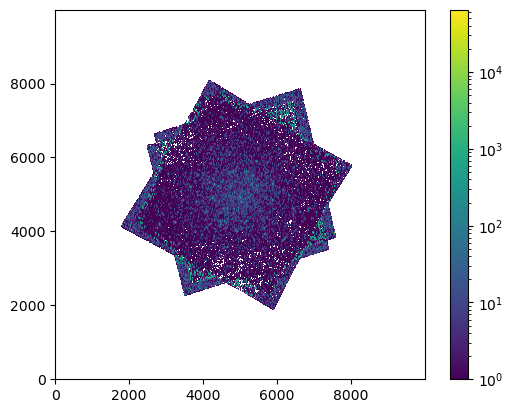

In [10]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [11]:
image_data_center_f275w = image_data_f275w[4000:6000, 4000:6000]

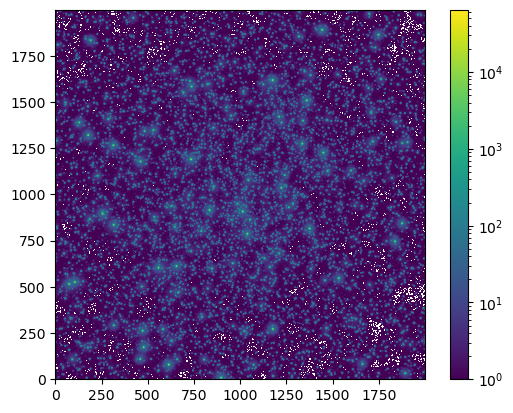

In [12]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f275w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [13]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [14]:
image_data_center_f336w = image_data_f336w[4000:6000, 4000:6000]

In [15]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f336w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

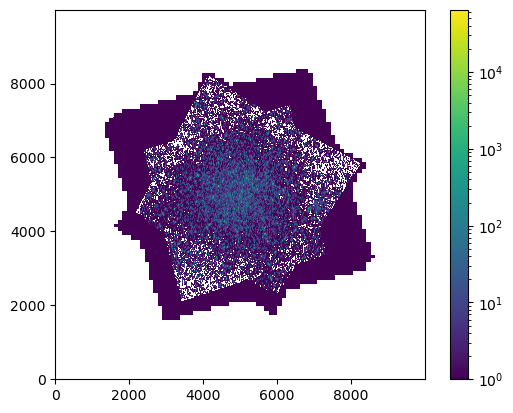

In [16]:
# matplotlib를 이용하여 구상성단의 모습 나타내기
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

In [17]:
image_data_center_f438w = image_data_f438w[4000:6000, 4000:6000]

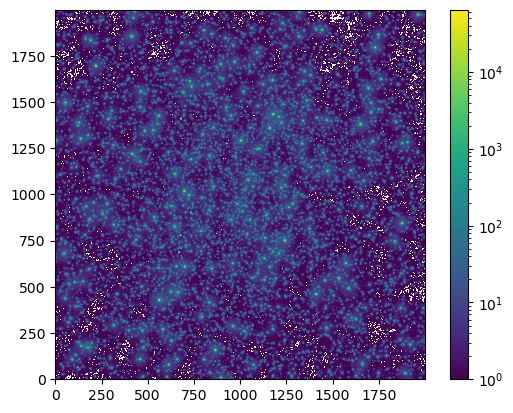

In [18]:
# 센터 부근에 대해 시각화 하기

plt.figure()
plt.imshow(image_data_center_f438w, origin = 'lower', norm = LogNorm())
plt.colorbar()
plt.show()

- plt.imshow()에서 origin의 역할
  
> plt.imshow() 함수에서 origin 매개변수는 이미지를 표시할 때 픽셀 좌표 시스템의 원점을 어디에 두는지를 지정하는 역할을 합니다. 이 매개변수는 이미지의 표시 방향을 제어하기 위해 사용됩니다.
>
> origin='upper' (기본값): 좌측 상단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 상단 모서리에서 시작하여 아래쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과는 다릅니다.
>
> origin='lower': 좌측 하단 모서리를 원점으로 간주합니다. 이 경우, 픽셀 좌표는 왼쪽 하단 모서리에서 시작하여 위쪽으로 행이 증가하고 오른쪽으로 열이 증가합니다. 이것은 일반적인 이미지 표시 방식과 일치합니다.
>
> 대부분의 경우, 이미지 데이터는 origin='upper'로 저장되어 있기 때문에 origin 매개변수를 따로 지정할 필요가 없습니다. 그러나 이미지 데이터가 origin='lower'로 저장되어 있는 경우, 표시 방식을 올바르게 하기 위해 이 매개변수를 설정할 수 있습니다.

## 1.2 그레이 스케일로 나타내기

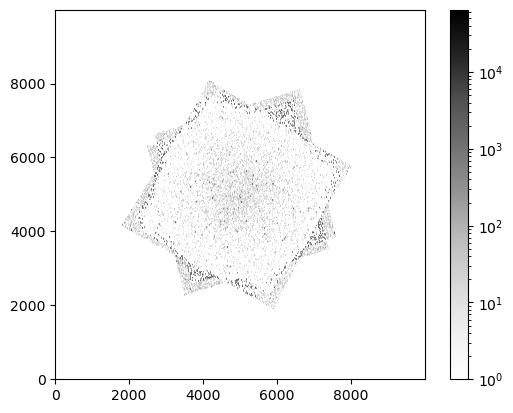

In [19]:
# cmap을 'Greys'로 바꾸고 norm을 LogNorm으로 바꾸기
# 데이터의 범위, order가 넓다 보니 LogNorm으로 정규화함

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Greys 컬러맵의 f275w 이미지 

plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

In [20]:
# Greys 컬러맵의 f336w 이미지 
plt.figure()
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

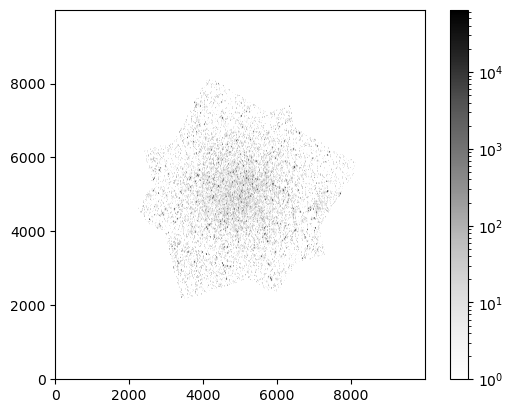

In [21]:
# Greys 컬러맵의 f475w 이미지 
plt.figure()
plt.imshow(image_data_f438w, origin = 'lower', cmap = 'Greys', norm = LogNorm())
plt.colorbar()
plt.show()

**(참고)**

- 데이터의 작은 부분에 집중하기 위해서는 이미지에서 x와 y의 범위를 선택하여 특정 영역에 포커싱해서 fits 이미지를 살펴봄

- 전체 dimension을 확인하기 위해 info() 함수나 .shape을 사용 

In [22]:
# FITS 데이터를 RGB 이미지로 변환합니다.
# 이 예제에서는 파장1을 빨강(R), 파장2를 녹색(G), 파장3을 파랑(B)으로 사용합니다.
rgb_image = np.dstack((image_data_f275w, image_data_f336w, image_data_f438w))
rgb_image.shape

(10000, 10000, 3)

In [23]:
from PIL import Image

# RGB 이미지를 PIL 이미지로 변환
pil_image = Image.fromarray((rgb_image * 255).astype(np.uint8))

# save 함수 이용 이미지 저장
pil_image.save('plot/ngc6723_PIL_Image_rgb.jpg')

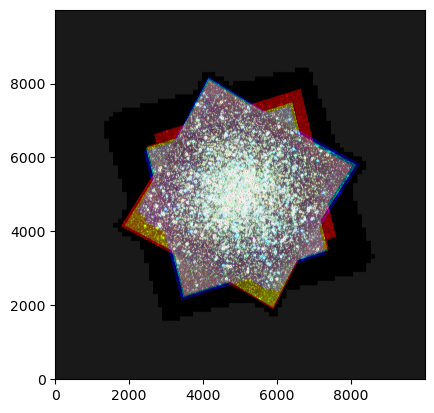

In [24]:
plt.imshow(pil_image, origin = 'lower')
plt.show()

In [25]:
type(image_data_f275w)

numpy.ndarray

## 1.3 lupton RGB 



<img src="./image/stretching.png" width="400" height="400"/>

asinh stretching(명암 대비) 방법을 사용하는 make_lupton_rgb 함수를 활용하여 시각화

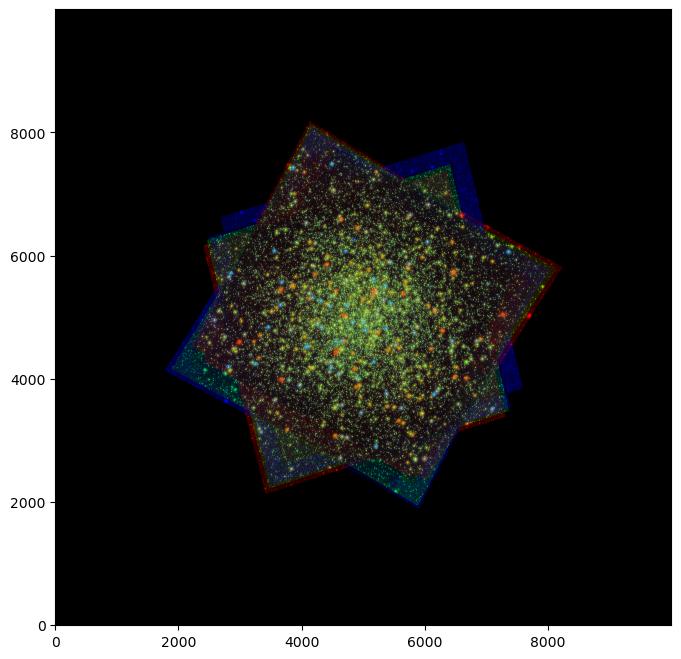

In [26]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f438w.copy()

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r, g, b, filename="plot/ngc6723_lupton_rgb_basic.png",)
plt.imshow(rgb_default, origin='lower')

In [27]:
# stretch와 Q값 조절 #1

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f438w.copy()

plt.figure(figsize = (8, 8))
rgb_default = make_lupton_rgb(r*0.9, g*1.0, b*1.1, stretch = 50, Q = 0.01, filename="plot/ngc6723_lupton_rgb_tune_1.png")
plt.imshow(rgb_default, origin='lower')

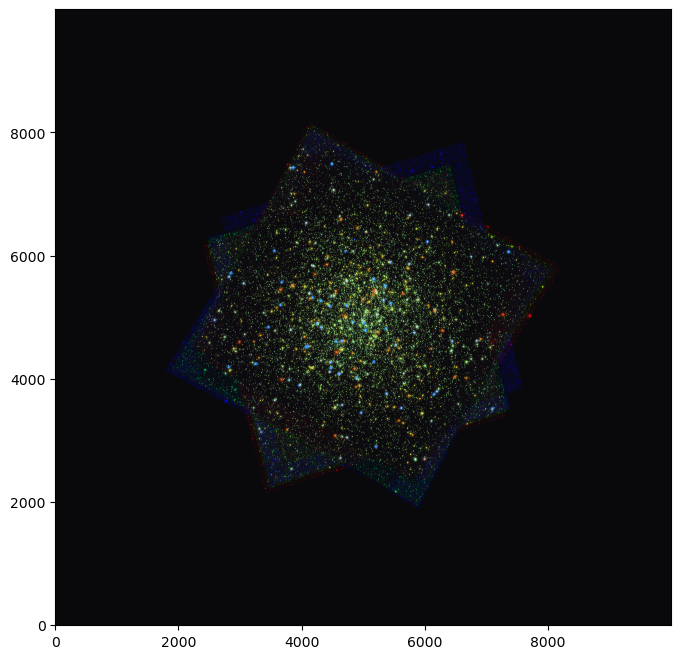

In [101]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f438w = np.max(image_data_f438w)

imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
imputed_data2_f438w = np.where(image_data_f438w < 1, 1, image_data_f438w)


b = imputed_data2_f275w.copy()
g = imputed_data2_f336w.copy()
r = imputed_data2_f438w.copy()

t_r = 1000
r[r > t_r] = t_r

t_g = 1000
g[g > t_g] = t_g

t_b = 1000
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*0.9, g*0.95, b*1.2, stretch = 25, Q = 0.01, filename="plot/ngc6723_lupton_rgb_tune_2.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

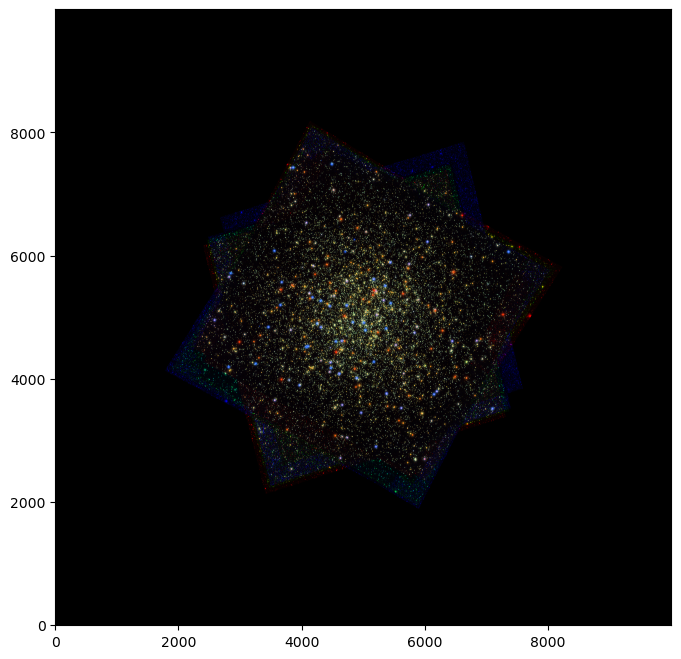

In [105]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 
max_f275w = np.max(image_data_f275w)
max_f336w = np.max(image_data_f336w)
max_f438w = np.max(image_data_f438w)

# truncation 삭제
# imputed_data2_f275w = np.where(image_data_f275w < 1, 1, image_data_f275w)
# imputed_data2_f336w = np.where(image_data_f336w < 1, 1, image_data_f336w)
# imputed_data2_f438w = np.where(image_data_f438w < 1, 1, image_data_f438w)


b = image_data_f275w.copy()
g = image_data_f336w.copy()
r = image_data_f438w.copy()


t_r = 1000
r[r > t_r] = t_r

t_g = 1000
g[g > t_g] = t_g

t_b = 1000
b[b > t_b] = t_b

rgb_default = make_lupton_rgb(r*1.0, g*0.8, b*1.2, stretch =30, Q= 0.01, filename="plot/ngc6723_lupton_rgb_tune_3.png")
plt.figure(figsize= (8, 8))
plt.imshow(rgb_default, origin='lower')

----

HUGS 제공 RGB 합성 사진 (목표 사진/모범 답안)
---

<img src="image/ngc6723_RGB.png" width="800" height="800"/>

In [30]:
import os
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

# 2. Photutils-detection

* Photutils: An Astropy Package for Photometry

> `Photutils`는 파이썬의 과학 이미지 처리 및 천체학 이미지 분석을 위한 패키지입니다. 'photutils'는 다양한 이미 처리 작업에 사용되며, 주로 천문학에서 물체의 위치, 밝기, 크기 및 형태를 추출하고 측정하는 데 사용됩니다. 다음은 photutils의 주요 기능과 몇 가지 예시입니다:
> 
> 1. **Aperture Photometry**: photutils를 사용하여 이미지에서 특정 물체 주위의 원 또는 타원 모양의 영역(아파처)을 정의하고 해당 아파처 내의 픽셀 값을 합산하여 물체의 밝기를 측정할 수 있습니다. 이것은 천체학적 객체의 등급 측정에 유용합니다.
> 
> 2. **PSF Photometry**: Point Spread Function (PSF) 기반의 천체 항목 검출 및 등급 측정을 수행합니다. 이것은 천체학 이미지에서 별과 같은 지점 소스를 분석하는 데 사용됩니다.
>
> 3. **Background Subtraction**: 이미지에서 백그라운드 레벨을 추정하고 이를 천체학적 객체의 밝기 측정에 사용할 수 있습니다.
>
> 4. **Detection and Segmentation**: 물체를 감지하고 분할(segment)하는 도구를 제공합니다. 물체의 위치를 식별하고 관심 물체를 분리하는 데 사용됩니다.
> 
> 5. **Photometry Algorithms**: 여러 가지 다양한 천체학적 등급 측정 알고리즘을 제공하며 사용자는 필요에 따라 선택할 수 있습니다.
> 
> photutils는 간단한 작업부터 복잡한 이미지 분석 작업까지 다양한 천체학적 이미지 처리 작업을 수행할 수 있는 강력한 도구를 제공합니다. 이 패키지는 과학 연구 및 천체학 연구에서 자주 사용되며, 파이썬으로 이미지 처리 및 분석을 수행하려는 연구자 및 과학자에게 유용합니다.

## 2.1 simga clipped stats

In [31]:
# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
mean_f275w, median_f275w, std_f275w = sigma_clipped_stats(image_data_f275w, sigma = 3.0) # 기본값이 sigma = 3
mean_f336w, median_f336w, std_f336w = sigma_clipped_stats(image_data_f336w, sigma = 3.0)
mean_f438w, median_f438w, std_f438w = sigma_clipped_stats(image_data_f438w, sigma = 3.0)

sigma-clipping 

>    Perform sigma-clipping on the provided data.
>
>   The data will be iterated over, each time rejecting values that are
    less or more than a specified number of standard deviations from a
    center value.
>
>   Clipped (rejected) pixels are those where::
>
>        data < center - (sigma_lower * std)
>        data > center + (sigma_upper * std)
>
>    where::
>
>        center = cenfunc(data [, axis=])
>        std = stdfunc(data [, axis=])
>
>    Invalid data values (i.e., NaN or inf) are automatically clipped.
>
>    For an object-oriented interface to sigma clipping, see
>    :class:`SigmaClip`.
>

sigma_clipped_stats 함수는 주어진 데이터에서 이상치를 제외하고 계산된 평균, 중간값, 표준 편차를 반환합니다. 이를 사용하여 데이터의 중심 경향성과 분포를 이상치에 영향받지 않고 더 정확하게 평가할 수 있습니다.

$$\frac{{\sigma}_{old} - {\sigma}_{new}}{{\sigma}_{new}}$$

In [32]:
# print data
print(f'mean of image_data_f275w: {mean_f275w}')
print(f'median of image_data_f275w: {median_f275w}')
print(f'standard deviation of image_data_f275w: {std_f275w}')
print("\n")

# print data
print(f'mean of image_data_f336w: {mean_f336w}')
print(f'median of image_data_f336w: {median_f336w}')
print(f'standard deviation of image_data_f336w: {std_f336w}')
print("\n")

# print data
print(f'mean of image_data_f435w: {mean_f438w}')
print(f'median of image_data_f435w: {median_f438w}')
print(f'standard deviation of image_data_f435w: {std_f438w}')

mean of image_data_f275w: -16.0950927734375
median of image_data_f275w: -25.0
standard deviation of image_data_f275w: 12.256363868713379


mean of image_data_f336w: -16.165395736694336
median of image_data_f336w: -25.0
standard deviation of image_data_f336w: 12.268013000488281


mean of image_data_f435w: -16.127342224121094
median of image_data_f435w: -25.0
standard deviation of image_data_f435w: 12.281991004943848


In [33]:
# 원본 데이터와 비교 

print('Min_f275w:', np.min(image_data_f275w))
print('Max_f275w:', np.max(image_data_f275w))
print('Mean_f275w:', np.mean(image_data_f275w))
print("Median_f275w:", np.median(image_data_f275w))
print('Stdev_f275w:', np.std(image_data_f275w))
print('-'*50)

print('Min_f336w:', np.min(image_data_f336w))
print('Max_f336w:', np.max(image_data_f336w))
print('Mean_f336w:', np.mean(image_data_f336w))
print('Median_f336w:', np.median(image_data_f336w)) 
print('Stdev_f336w:', np.std(image_data_f336w))
print('-'*50)

print('Min_f435w:', np.min(image_data_f438w))
print('Max_f435w:', np.max(image_data_f438w))
print('Mean_f435w:', np.mean(image_data_f438w))
print('Median_f435w:', np.median(image_data_f438w))
print('Stdev_f435w:', np.std(image_data_f438w))

Min_f275w: -39.0
Max_f275w: 64750.0
Mean_f275w: -10.289898
Median_f275w: -25.0
Stdev_f275w: 462.32993
--------------------------------------------------
Min_f336w: -36.0
Max_f336w: 64750.0
Mean_f336w: -12.709269
Median_f336w: -25.0
Stdev_f336w: 236.43031
--------------------------------------------------
Min_f435w: -29.0
Max_f435w: 64750.0
Mean_f435w: -13.576448
Median_f435w: -25.0
Stdev_f435w: 193.46739


## 2.2 DAOStarFinder

In [34]:
'''Use DAOStarFinder to detect stars'''

from photutils.detection import DAOStarFinder

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
daofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f275w)
daofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f336w)
daofind_f438w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std_f438w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
sources_f275w = daofind_f275w(image_data_f275w - median_f275w)
sources_f336w = daofind_f336w(image_data_f336w - median_f336w)
sources_f438w = daofind_f438w(image_data_f438w - median_f438w)

In [35]:
print(f'sources_f275w의 길이는 {len(sources_f275w)}')
print(f'sources_f336w의 길이는 {len(sources_f336w)}')
print(f'sources_f435w의 길이는 {len(sources_f438w)}')

sources_f275w의 길이는 25739
sources_f336w의 길이는 25136
sources_f435w의 길이는 22620


In [36]:
# format sources table 
for col in sources_f275w.colnames:
    if col not in ('id', 'npix'):
        sources_f275w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f275w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f336w.colnames:
    if col not in ('id', 'npix'):
        sources_f336w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f336w.pprint(max_width = 76)
print("= ="*40)
#-----------------------------------------------------------#
for col in sources_f438w.colnames:
    if col not in ('id', 'npix'):
        sources_f438w[col].info.format = '%.2f'

# print table (make sure to use 'p-print' not just 'print')
sources_f438w.pprint(max_width = 76)
print("= ="*40)

  id  xcentroid ycentroid sharpness ... sky    peak    flux   mag 
----- --------- --------- --------- ... ---- -------- ------ -----
    1   5906.84   1898.60      0.88 ... 0.00  1231.00  14.72 -2.92
    2   5908.23   1902.10      0.71 ... 0.00  2490.00  36.53 -3.91
    3   5895.78   1907.24      0.99 ... 0.00   678.00   7.70 -2.22
    4   5907.15   1907.50      0.73 ... 0.00  1339.00  18.69 -3.18
    5   5875.07   1908.96      0.92 ... 0.00   641.00   7.62 -2.20
    6   5864.56   1909.50      0.53 ... 0.00   289.00   4.30 -1.58
    7   5873.04   1915.75      0.87 ... 0.00  1235.00  15.30 -2.96
  ...       ...       ...       ... ...  ...      ...    ...   ...
25733   4173.94   8034.05      0.83 ... 0.00 16446.00 217.40 -5.84
25734   4231.81   8035.29      0.47 ... 0.00   285.00   4.77 -1.70
25735   4201.28   8037.43      0.65 ... 0.00  1823.00  25.12 -3.50
25736   4181.81   8046.98      0.78 ... 0.00   422.00   5.50 -1.85
25737   4146.24   8047.50      0.61 ... 0.00   134.00   1.54 -

### CircularAperture

#### f275w visualization

In [37]:
# matplotlib를 이용한 구상성단 시각화

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture

# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f275w = np.transpose((sources_f275w['xcentroid'], sources_f275w['ycentroid']))
apertures_f275w = CircularAperture(positions_f275w, r = 5.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f275w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f336w visualization

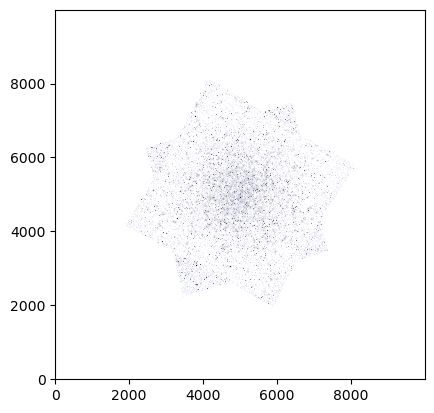

In [38]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f336w = np.transpose((sources_f336w['xcentroid'], sources_f336w['ycentroid']))
apertures_f336w = CircularAperture(positions_f336w, r = 5.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f336w.plot(color = 'blue', lw = 0.1, alpha = 0.1);

#### f435w visualization

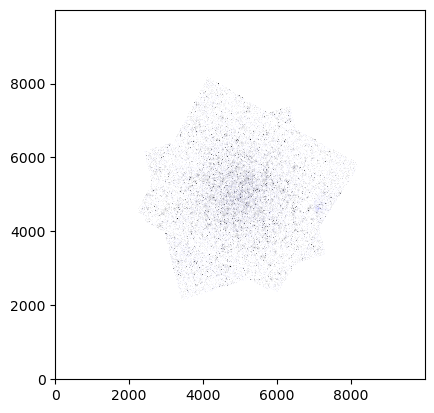

In [39]:
# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
positions_f438w = np.transpose((sources_f438w['xcentroid'], sources_f438w['ycentroid']))
apertures_f438w = CircularAperture(positions_f438w, r = 5.0)
plt.imshow(image_data_f438w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
apertures_f438w.plot(color = 'blue', lw = 0.1, alpha = 0.1);


> Supported values for interpolation are 
> 'bicubic', 'antialiased', 'spline36', 'bilinear', 'gaussian', 
> 'lanczos', 'blackman', 'nearest', 'kaiser', 'quadric', 'mitchell', 
> 'catrom', 'hanning', 'none', 'spline16', 
> 'bessel', 'hermite', 'hamming', 'sinc'


### Find peaks

- 피크 픽셀을 찾는 방법

    + 피크는 로컬 영역 내에서 임계값을 초과하는 최대값

        * 로컬 영역 내의 여러 픽셀이 동일한 강도를 갖는 경우 해당 픽셀의 좌표를 모두 반환
        * 그렇지 않을 경우, 로컬 영역당 피크 픽셀이 하나만 있음
        * 따라서 정의된 영역은 영역 내에 동일한 피크가 없는 한 피크 간 최소 간격을 효과적으로 부과할 수 있음
        * 또한 픽셀이므로 결과는 정수 좌표로 나오게 됨

#### f275w visualization

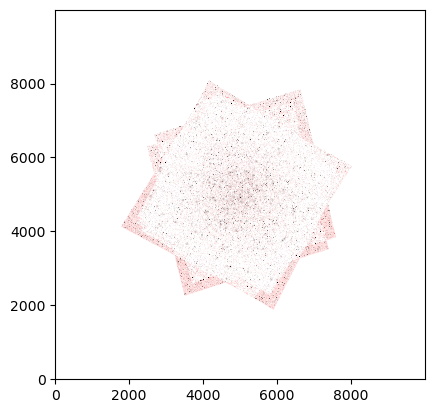

In [40]:
# 사용하는 함수 import 

from photutils.detection import find_peaks

# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f275w = median_f275w + (5.0 * std_f275w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f275w = find_peaks(image_data_f275w - median_f275w, threshold_f275w, box_size = 11)
peaks_f275w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f275w = np.transpose((peaks_f275w['x_peak'], peaks_f275w['y_peak']))
peak_apertures_f275w = CircularAperture(peak_positions_f275w, r = 3.0)
plt.imshow(image_data_f275w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f275w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f336w visualization

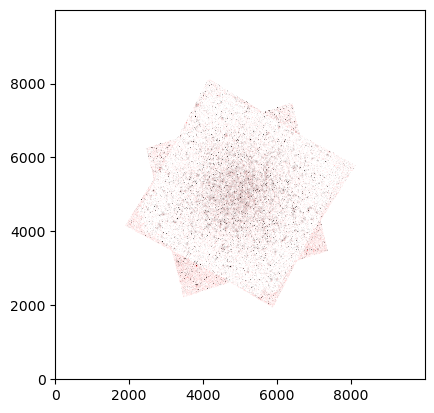

In [41]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f336w = median_f336w + (5.0 * std_f336w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f336w = find_peaks(image_data_f336w - median_f336w, threshold_f336w, box_size = 11)
peaks_f336w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f336w = np.transpose((peaks_f336w['x_peak'], peaks_f336w['y_peak']))
peak_apertures_f336w = CircularAperture(peak_positions_f336w, r = 3.0)
plt.imshow(image_data_f336w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f336w.plot(color = 'red', lw = 0.3, alpha = 0.1);

#### f438w visualization

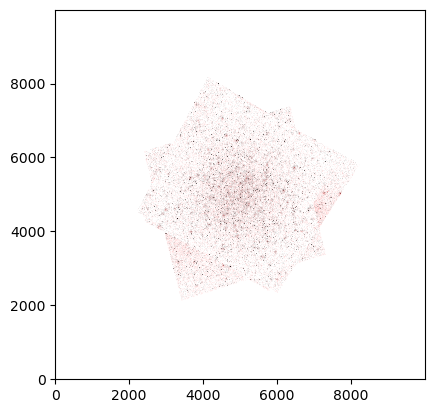

In [42]:
# 이미지에서 배경보다 5 시그마 위쪽에 있고 
threshold_f438w = median_f438w + (5.0 * std_f438w)

# 5픽셀 이상 떨어져 있는 로컬 피크를 찾는 방법 
# box_size는 탐색하는 로컬 영역의 크기를 지정하는 인수
# box_size는 (찾으려는 폭 * 2 + 1(자기 자신))의 크기로 설정(ex: 5 pixels * 2 + 1 pixel = 11)
peaks_f438w = find_peaks(image_data_f438w - median_f438w, threshold_f438w, box_size = 11)
peaks_f438w['peak_value'].info.format = '%8g' # 출력 형식 자릿수 지정 

# 피크 포지션을 이용하여 원형 aperture를 생성하고 plt.imshow로 시각화
peak_positions_f438w = np.transpose((peaks_f438w['x_peak'], peaks_f438w['y_peak']))
peak_apertures_f438w = CircularAperture(peak_positions_f438w, r = 3.0)
plt.imshow(image_data_f438w, cmap = 'Greys', origin = 'lower', norm = LogNorm(), interpolation = 'nearest')
peak_apertures_f438w.plot(color = 'red', lw = 0.3, alpha = 0.1);

밝은 별들에 대한 마스킹 실시 후 시각화

## 2.3 백그라운드 산출 및 제거

1. 백그라운드를 제거하세요. photutils를 사용하여 백그라운드를 추정하고 제거할 수 있습니다. 예를 들어, MedianBackground 추정을 사용할 수 있습니다:

In [43]:
from photutils.background import Background2D
from photutils.background import MedianBackground

bkg_estimator = MedianBackground()
bkg_f275w = Background2D(image_data_f275w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f275w = image_data_f275w - bkg_f275w.background

bkg_f336w = Background2D(image_data_f336w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f336w = image_data_f275w - bkg_f336w.background

bkg_f438w = Background2D(image_data_f438w, (50, 50), filter_size=(3, 3), bkg_estimator=bkg_estimator)
new_f438w = image_data_f438w - bkg_f438w.background

위 코드에서 (50, 50)은 백그라운드를 추정하는 데 사용되는 격자 크기입니다. filter_size는 백그라운드를 평활화하기 위한 필터 크기입니다.

이미지를 그리세요. plt.imshow()를 사용하여 이미지를 그릴 수 있습니다:

In [44]:
print(np.quantile(image_data_f275w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f336w,np.arange(0.0, 1.1, 0.1)))
print(np.quantile(image_data_f438w,np.arange(0.0, 1.1, 0.1)))

print(np.quantile(image_data_f275w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f336w,np.arange(0.90, 1.01, 0.01)))
print(np.quantile(image_data_f438w,np.arange(0.90, 1.01, 0.01)))

[-3.900e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  1.000e+00  6.475e+04]
[-3.600e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  1.000e+00  6.475e+04]
[-2.900e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01 -2.500e+01
 -2.500e+01 -1.000e+00  0.000e+00  1.000e+00  6.475e+04]
[1.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00
 4.000e+00 5.000e+00 1.000e+01 6.475e+04]
[1.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 4.000e+00
 5.000e+00 8.000e+00 1.800e+01 6.475e+04]
[1.000e+00 2.000e+00 2.000e+00 2.000e+00 3.000e+00 3.000e+00 4.000e+00
 5.000e+00 7.000e+00 1.400e+01 6.475e+04]


In [45]:
print(np.__version__)

1.26.2


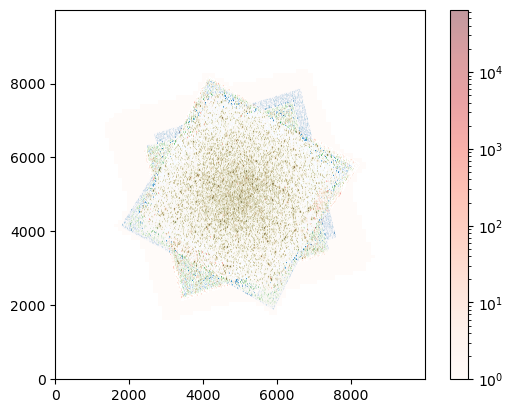

In [46]:
plt.figure()
plt.imshow(image_data_f275w, origin = 'lower', cmap = 'Blues', norm = LogNorm())
plt.imshow(image_data_f336w, origin = 'lower', cmap = 'Greens', norm = LogNorm(), alpha = 0.8)
plt.imshow(image_data_f438w, origin = 'lower', cmap = 'Reds', norm = LogNorm(), alpha = 0.4)
plt.colorbar()
plt.show()

# 3. 광도 측정

In [47]:
# variable "section1" contains our image data
# variable "positions" contains our positions 
# variable "apertures" contains our aperture data

'''find background values by drawing an anulus around each star'''

# import tools 
from photutils.aperture import CircularAnnulus
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats
from photutils.aperture import aperture_photometry



# define annuluses
annulus_aperture_f275w = CircularAnnulus(positions_f275w, r_in = 10, r_out = 15)
annulus_aperture_f336w = CircularAnnulus(positions_f336w, r_in = 10, r_out = 15)
annulus_aperture_f438w = CircularAnnulus(positions_f438w, r_in = 10, r_out = 15)

### Partial Region Visualization

In [48]:
# define annuluses of partial region

# 이상치가 제거된 범위 안에서 mean, median and standard deviation 찾기

from astropy.stats import sigma_clipped_stats
pmean_f275w, pmedian_f275w, pstd_f275w = sigma_clipped_stats(image_data_f275w[4500:4600, 4500:4600], sigma = 3.0) # 기본값이 sigma = 3
pmean_f336w, pmedian_f336w, pstd_f336w = sigma_clipped_stats(image_data_f336w[4500:4600, 4500:4600], sigma = 3.0)
pmean_f438w, pmedian_f438w, pstd_f438w = sigma_clipped_stats(image_data_f438w[4500:4600, 4500:4600], sigma = 3.0)

# 가우시안 커널을 이용하는 DAOStarFinder 이용, 소스 확인
# DAOStarFinder의 인스턴스를 사용하여 이미지에서 약 3픽셀의 FWHM을 가지며 배경보다 약 5 시그마 위에 피크가 있는 별을 찾도록 설정 
pdaofind_f275w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f275w)
pdaofind_f336w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f336w)
pdaofind_f438w = DAOStarFinder(fwhm = 3.0, threshold = 5.0*pstd_f438w)

# 백그라운드(배경)의 값을 빼준 2D-array에서 별을 찾도록 daofind 함수 적용
psources_f275w = daofind_f275w(image_data_f275w[4500:4600, 4500:4600] - pmedian_f275w)
psources_f336w = daofind_f336w(image_data_f336w[4500:4600, 4500:4600] - pmedian_f336w)
psources_f438w = daofind_f438w(image_data_f438w[4500:4600, 4500:4600] - pmedian_f438w)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f275w = np.transpose((psources_f275w['xcentroid'], psources_f275w['ycentroid']))
papertures_f275w = CircularAperture(ppositions_f275w, r = 5.0)
pannulus_aperture_f275w = CircularAnnulus(ppositions_f275w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f336w = np.transpose((psources_f336w['xcentroid'], psources_f336w['ycentroid']))
papertures_f336w = CircularAperture(ppositions_f336w, r = 5.0)
pannulus_aperture_f336w = CircularAnnulus(ppositions_f336w, r_in = 10, r_out = 15)


# 별의 위치를 기록할 positions를 잡고, 5픽셀 반경으로 원형 aperture를 설정함 
ppositions_f438w = np.transpose((psources_f438w['xcentroid'], psources_f438w['ycentroid']))
papertures_f438w = CircularAperture(ppositions_f438w, r = 5.0)
pannulus_aperture_f438w = CircularAnnulus(ppositions_f438w, r_in = 10, r_out = 15)

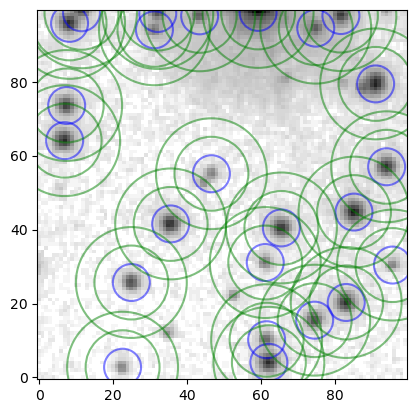

In [49]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f275w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f275w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f275w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

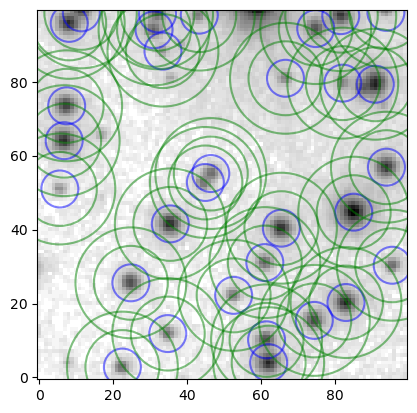

In [50]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f336w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f336w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f336w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

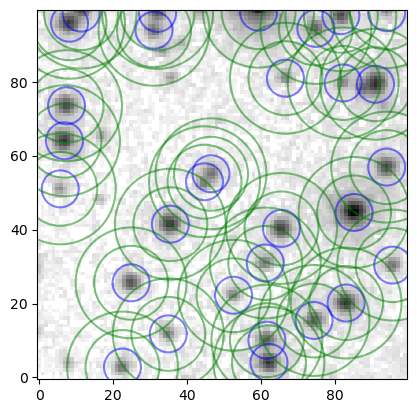

In [51]:
# plot annuluses
plt.figure()
plt.imshow(image_data_f438w[4500:4600, 4500:4600], cmap = 'Greys', norm = LogNorm(), origin = 'lower')
papertures_f438w.plot(color = 'blue', lw = 1.5, alpha = 0.5);
pannulus_aperture_f438w.plot(color = 'green', lw = 1.5, alpha = 0.5);
plt.show()

maximum value of R-channel: 5911.0
maximum value of G-channel: 7745.0
maximum value of B-channel: 3587.0


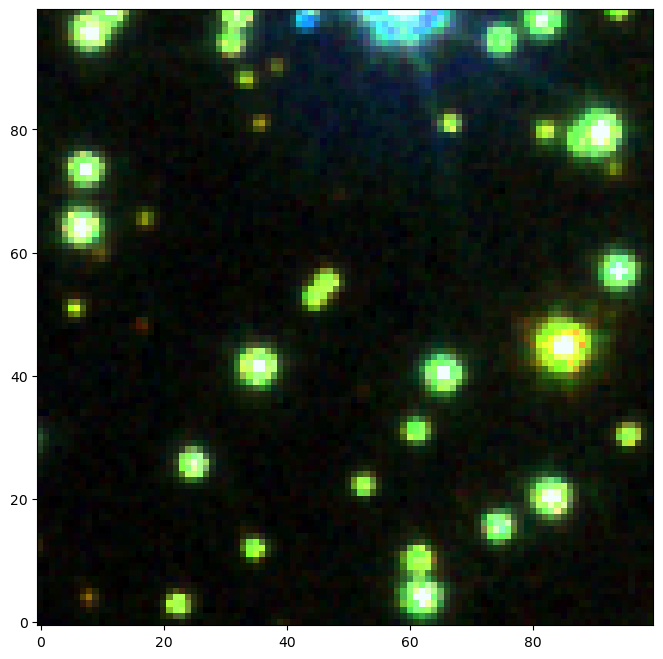

In [107]:
# stretch와 Q값 조절 # 2

# stretch(default 8): 명암대비, 너무 높은 값은 노이즈 반영
# Q(default 5): 색상 포화도, 낮은 값은 흐리게, 높은 값은 더 색을 강조

# np.where절을 이용한 imputation 

b = image_data_f275w[4500:4600, 4500:4600].copy()
g = image_data_f336w[4500:4600, 4500:4600].copy()
r = image_data_f438w[4500:4600, 4500:4600].copy()

print(f"maximum value of R-channel: {r.max()}")

print(f"maximum value of G-channel: {g.max()}")

print(f"maximum value of B-channel: {b.max()}")

t_r = 500
r[r > t_r] = t_r

t_g = 500
g[g > t_g] = t_g

t_b = 500
b[b > t_b] = t_b

lupton_rgb1 = make_lupton_rgb(r*0.95, g*1.0, b*1.0, stretch = 100, Q = 0.1, filename="plot/ngc6723_lupton_rgb_partial_1.png")
plt.figure(figsize= (8, 8))
plt.imshow(lupton_rgb1, origin='lower')

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 그래프를 표시합니다.
plt.show()


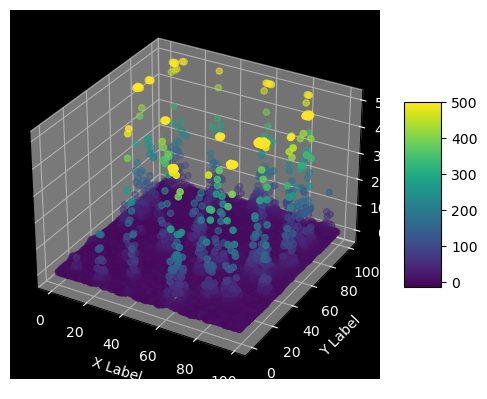

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure()

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 행렬의 값을 z 좌표로 사용하여 3D 산점도를 그립니다.
z = matrix.flatten()
scatter = ax.scatter(x.flatten(), y.flatten(), z, c = z, cmap = 'viridis')
fig.colorbar(scatter, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



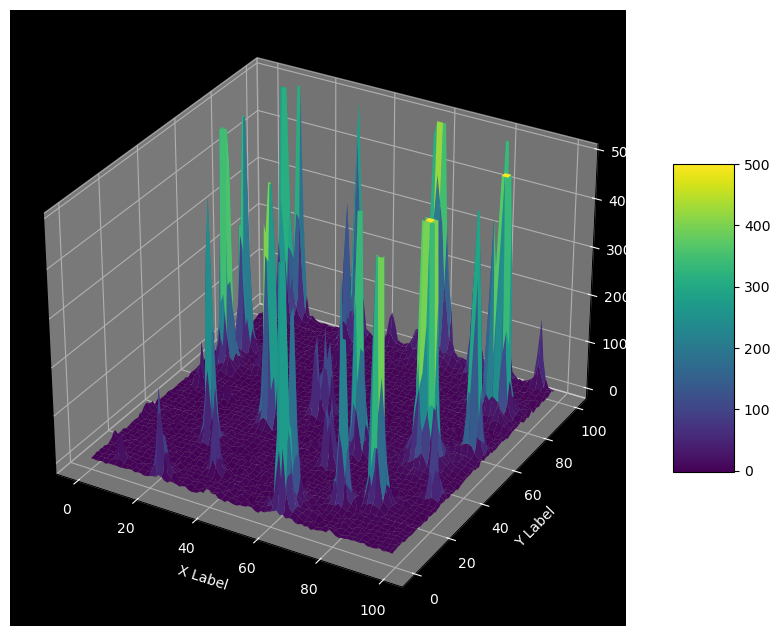

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# truncation을 실시한 R-channel(f438w) 데이터에 대한 3차원 시각화
matrix = r.copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



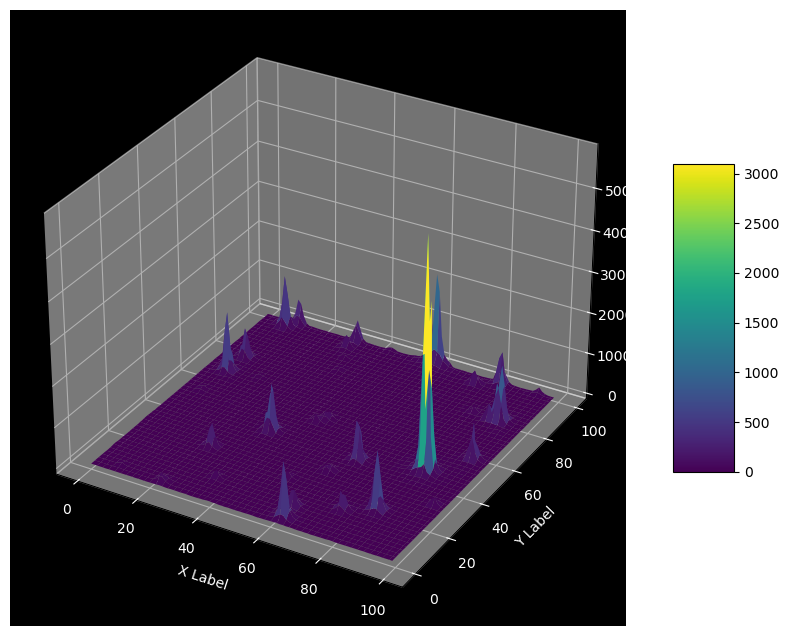

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 임의의 2차원 행렬을 생성합니다.
matrix = image_data_f438w[4500:4600, 4500:4600].copy()

# 행렬의 x, y 좌표를 생성합니다. (여기서는 인덱스를 사용합니다)
x = np.arange(matrix.shape[0])
y = np.arange(matrix.shape[1])
x, y = np.meshgrid(x, y)

# 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(12, 8))

# 3D 축을 추가합니다.
ax = fig.add_subplot(111, projection='3d')

# 배경색을 검은색으로 설정합니다.
ax.set_facecolor('black')

# 표면 그래프 그리기
surf = ax.plot_surface(x, y, matrix, cmap='viridis')

# 컬러 바를 추가합니다.
fig.colorbar(surf, shrink=0.5, aspect=5)

# 레이블을 추가합니다.
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 레이블을 추가하고 색상을 흰색으로 설정합니다.
ax.set_xlabel('X Label', color='white')
ax.set_ylabel('Y Label', color='white')
ax.set_zlabel('Z Label', color='white')

# 눈금의 색상을 변경합니다.
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')


# 그래프를 표시합니다.
plt.show()



In [57]:
matrix.max()

5911.0

### define background and perform aperture photometry

In [58]:
# define background_f275w
aperstats_f275w = ApertureStats(image_data_f275w, annulus_aperture_f275w)
bkg_mean_f275w = aperstats_f275w.mean
aperture_area_f275w = apertures_f275w.area_overlap(image_data_f275w)
total_bkg_f275w = bkg_mean_f275w * aperture_area_f275w

# define background_336w
aperstats_f336w = ApertureStats(image_data_f336w, annulus_aperture_f336w)
bkg_mean_f336w = aperstats_f336w.mean
aperture_area_f336w = apertures_f336w.area_overlap(image_data_f336w)
total_bkg_f336w = bkg_mean_f336w * aperture_area_f336w

# define background_435w
aperstats_f438w = ApertureStats(image_data_f438w, annulus_aperture_f438w)
bkg_mean_f438w = aperstats_f438w.mean
aperture_area_f438w = apertures_f438w.area_overlap(image_data_f438w)
total_bkg_f438w = bkg_mean_f438w * aperture_area_f438w

# perform aperture photometry
star_data_f275w = aperture_photometry(image_data_f275w, apertures_f275w)
star_data_f336w = aperture_photometry(image_data_f336w, apertures_f336w)
star_data_f438w = aperture_photometry(image_data_f438w, apertures_f438w)


# add backgrounds to table
star_data_f275w['total_bkg'] = total_bkg_f275w
star_data_f336w['total_bkg'] = total_bkg_f336w
star_data_f438w['total_bkg'] = total_bkg_f438w



In [59]:
# format and print data
for col in star_data_f275w.colnames:
    star_data_f275w[col].info.format = '%.8g'

star_data_f275w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg
         pix       pix                          
----- --------- --------- ------------ ---------
    1 5906.8442 1898.5971    11229.764 347.01776
    2 5908.2253 1902.0989    12081.254 282.62282
    3 5895.7809 1907.2353    1282.4191 3198.6943
    4 5907.1475 1907.5042     6016.183 604.61598
    5 5875.0652 1908.9644    1550.5712 1163.7083
    6 5864.5568 1909.5019    1376.3121 1649.3361
  ...       ...       ...          ...       ...
25733 4173.9351 8034.0458    44025.005 787.19679
25734 4231.8138 8035.2906    1380.8201 3910.2037
25735 4201.2775 8037.4285    9080.1361 18.585758
25736 4181.8135 8046.9769    1140.3853 2560.0003
25737 4146.2361 8047.4992    674.15051 423.59673
25738  4152.413 8055.1117    4133.2923 791.97637
25739 4156.0293 8066.7217    3582.4868 844.25281
Length = 25739 rows


In [60]:
# format and print data
for col in star_data_f336w.colnames:
    star_data_f336w[col].info.format = '%.8g'

star_data_f336w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 5868.1252 1955.5463    2502.3826  19.534262
    2 5896.3951 1976.7952    1967.4414  36.080474
    3 5866.9319 1978.8625    1826.5391  10.017834
    4 5917.9017 2008.2337    3120.7946  315.76622
    5 5889.2873  2008.784    2064.9071  43.566616
    6 5871.8714  2014.319    9900.7539  686.37834
  ...       ...       ...          ...        ...
25130 4188.6766 8079.8798    1706.4882  364.06684
25131 4155.5571 8083.0127    2038.7515 -10.591884
25132 4190.8651 8085.5566    1482.8043  651.67909
25133 4177.7116  8086.683    1612.4517  1048.2661
25134 4211.6446 8089.1122    1230.0344  485.99003
25135 4187.1146 8095.3742     2333.788  553.36683
25136 4186.4875 8102.2961    666.30259 -10.313309
Length = 25136 rows


In [61]:
# format and print data
for col in star_data_f438w.colnames:
    star_data_f438w[col].info.format = '%.8g'

star_data_f438w.pprint()

  id   xcenter   ycenter  aperture_sum total_bkg 
         pix       pix                           
----- --------- --------- ------------ ----------
    1 3431.6835 2144.7105    803.80231 -7.0124836
    2 3570.9502 2174.8363     3032.149  89.531394
    3 3572.7963 2175.9239    3072.2771  370.25913
    4 3534.4669 2179.2607    1504.3703 -23.123398
    5 3586.3878 2179.3883    2133.8856  114.29452
    6 3493.7662 2187.0422    4163.0559 -22.698208
  ...       ...       ...          ...        ...
22614 4160.7066 8072.0811    1563.4788  1042.5463
22615 4085.0656 8075.6514    9985.1192  123.30551
22616 4175.5915 8077.0643    7475.1107   86.15337
22617 4213.0301 8077.6129    1912.2102  2.6046368
22618  4187.394 8092.4373     11055.33  68.796902
22619  4186.536 8102.3328    730.99227  1908.2193
22620 4186.6245 8113.2757    1893.7833  129.57076
Length = 22620 rows


In [62]:
'''
find zeropoint from catalogue based on filter and instrument.
Install acs tools by typing the following command into the terminal:

$pip install acstools

ACStools: Python tools for Hubble Space Telescope Advanced Camera for Surveys data

The ACStools package contains Python tools to work with data 
from the Hubble Space Telescope (HST) Advanced Camera for Surveys (ACS). 
The package has several calibration utilities and a zeropoints calculator, 
can detect satellite trails, and offers destriping, polarization, and photometric tools.
'''
from acstools import acszpt

In [63]:
# header_f275w 정보 확인
print("==================f275w=================")
print(f"DATE in header: {header_f275w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f275w['INSTRUME']}")
print(f"FILTER in header: {header_f275w['FILTER']}")
print("-"*40)

# header_f336w 정보 확인
print("==================f336w=================")
print(f"DATE in header: {header_f336w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f336w['INSTRUME']}")
print(f"FILTER in header: {header_f336w['FILTER']}")
print("-"*50)

# header_f438w 정보 확인
print("==================f438w=================")
print(f"DATE in header: {header_f438w['DATE-OBS']}")
print(f"INSTRUMENT in header: {header_f438w['INSTRUME']}")
print(f"FILTER in header: {header_f438w['FILTER']}")
print("-"*50)

==================f275w=================
DATE in header: 2014-04-03T06:51:04
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F275W
----------------------------------------
==================f336w=================
DATE in header: 2014-04-03T06:43:14
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F336W
--------------------------------------------------
==================f438w=================
DATE in header: 2014-04-03T06:39:35
INSTRUMENT in header: WFC3-UVIS
FILTER in header: F438W
--------------------------------------------------


In [64]:
# find date in header 
date_f275w = '2012-10-25' # 형식 '2006-03-10'
instrument_f275w = 'WFC'  # 'WFC'
filter_f275w = 'F275W'    # 'F814W'

# find date in header 
date_f336w = '2012-10-25' # 형식 '2006-03-10'
instrument_f336w = 'WFC'  # 'WFC'
filter_f336w = 'F336W'    # 'F814W'

# find date in header 
date_f438w = '2012-10-25' # 형식 '2006-03-10'
instrument_f438w = 'WFC'  # 'WFC'
filter_f438w = 'F438W'    # 'F814W'

In [65]:
# fetch zeropoint from catalogue
q_f438w = acszpt.Query(date = date_f438w, detector = instrument_f438w)
zpt_table_f438w = q_f438w.fetch()

q_filter_f438w = acszpt.Query(date = date_f438w, detector = instrument_f438w, filt = filter_f438w)
filter_zpt_f438w = q_filter_f438w.fetch()

# print data
print(filter_zpt_f438w)

ERROR:acszpt.Query:F438W is not a valid filter for WFC
Please choose one of the following:
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


In [66]:
# fetch zeropoint from catalogue
q_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w)
zpt_table_f336w = q_f336w.fetch()

q_filter_f336w = acszpt.Query(date = date_f336w, detector = instrument_f336w, filt = filter_f336w)
filter_zpt_f336w = q_filter_f336w.fetch()

# print data
print(filter_zpt_f336w)

ERROR:acszpt.Query:F336W is not a valid filter for WFC
Please choose one of the following:
F435W
F475W
F502N
F550M
F555W
F606W
F625W
F658N
F660N
F775W
F814W
F850LP
F892N
-------------------------------------------------------------------------------


None


acstools 패키지에서 정보 조회가 어려우므로 

다음의 참고 문헌의 zeropoint 사용 

<img src="./image/zeropoint.png" width="600" height="600"/>


In [67]:
# use ABmag from filter_zpt
zeropoint_f275w = 24.14
zeropoint_f336w = 24.64

# find exposure time in header
extime_f275w = header_f275w['EXPTIME']
extime_f336w = header_f336w['EXPTIME']

print(zeropoint_f275w)
print(zeropoint_f336w)
print(extime_f275w)
print(extime_f336w)

24.14
24.64
4240.0
1878.0


In [68]:
star_data_f275w_df = star_data_f275w.to_pandas()
star_data_f336w_df = star_data_f336w.to_pandas()

In [69]:
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum    total_bkg
0   1  5906.844217  1898.597133  11229.763988   347.017760
1   2  5908.225303  1902.098946  12081.254028   282.622817
2   3  5895.780869  1907.235262   1282.419141  3198.694306
3   4  5907.147517  1907.504192   6016.183029   604.615977
4   5  5875.065211  1908.964428   1550.571227  1163.708271

In [70]:
star_data_f336w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg
0   1  5868.125247  1955.546257   2502.382648   19.534262
1   2  5896.395094  1976.795153   1967.441381   36.080474
2   3  5866.931919  1978.862543   1826.539117   10.017834
3   4  5917.901717  2008.233732   3120.794605  315.766218
4   5  5889.287297  2008.784028   2064.907087   43.566616

## Magnitude 계산

**MAGNITUDE = ZEROPOINT - 2.5*log_10{(APERTURE_SUM - TOTAL_BKG)/EXTIME}**

$$ Magnitude = Zeropoint -2.5*log_{10}{((Aperture\;sum - total\;background)/exposure\;time)}$$

- f275w 사진과 f336w 사진에 찍힌 별들의 강도에 따라 식별되지 않을 수도 있으며, star find 알고리즘(daofind)에 따라 정확한 위치 값은 상이할 수 있으므로
- float 형태의 값은 버림하고 정수로 일치
- 그 후 inner join 실시

In [71]:
star_data_f275w_df['diff_f275w'] = star_data_f275w_df['aperture_sum'] - star_data_f275w_df['total_bkg']
star_data_f275w_df['mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['diff_f275w'])/extime_f275w))
star_data_f275w_df.head()

id      xcenter      ycenter  aperture_sum    total_bkg    diff_f275w  \
0   1  5906.844217  1898.597133  11229.763988   347.017760  10882.746228   
1   2  5908.225303  1902.098946  12081.254028   282.622817  11798.631211   
2   3  5895.780869  1907.235262   1282.419141  3198.694306  -1916.275165   
3   4  5907.147517  1907.504192   6016.183029   604.615977   5411.567052   
4   5  5875.065211  1908.964428   1550.571227  1163.708271    386.862955   

   mag_f275w  
0  23.116568  
1  23.028836  
2  25.002270  
3  23.875107  
4  26.739522

In [72]:
star_data_f336w_df['diff_f336w'] = star_data_f336w_df['aperture_sum'] - star_data_f336w_df['total_bkg']
star_data_f336w_df['mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['diff_f336w'])/extime_f336w))
star_data_f336w_df.head()

id      xcenter      ycenter  aperture_sum   total_bkg   diff_f336w  \
0   1  5868.125247  1955.546257   2502.382648   19.534262  2482.848386   
1   2  5896.395094  1976.795153   1967.441381   36.080474  1931.360907   
2   3  5866.931919  1978.862543   1826.539117   10.017834  1816.521283   
3   4  5917.901717  2008.233732   3120.794605  315.766218  2805.028387   
4   5  5889.287297  2008.784028   2064.907087   43.566616  2021.340472   

   mag_f336w  
0  24.336863  
1  24.609580  
2  24.676138  
3  24.204396  
4  24.560140

In [73]:
# Join을 위해 버림 실시

star_data_f275w_df['xcenter'] = np.floor(star_data_f275w_df['xcenter']).astype(int);
star_data_f275w_df['ycenter'] = np.floor(star_data_f275w_df['ycenter']).astype(int);

star_data_f336w_df['xcenter'] = np.floor(star_data_f336w_df['xcenter']).astype(int);
star_data_f336w_df['ycenter'] = np.floor(star_data_f336w_df['ycenter']).astype(int);

In [74]:
star_data_f275w_df.head()

id  xcenter  ycenter  aperture_sum    total_bkg    diff_f275w  mag_f275w
0   1     5906     1898  11229.763988   347.017760  10882.746228  23.116568
1   2     5908     1902  12081.254028   282.622817  11798.631211  23.028836
2   3     5895     1907   1282.419141  3198.694306  -1916.275165  25.002270
3   4     5907     1907   6016.183029   604.615977   5411.567052  23.875107
4   5     5875     1908   1550.571227  1163.708271    386.862955  26.739522

In [75]:
star_data_f336w_df.head()

id  xcenter  ycenter  aperture_sum   total_bkg   diff_f336w  mag_f336w
0   1     5868     1955   2502.382648   19.534262  2482.848386  24.336863
1   2     5896     1976   1967.441381   36.080474  1931.360907  24.609580
2   3     5866     1978   1826.539117   10.017834  1816.521283  24.676138
3   4     5917     2008   3120.794605  315.766218  2805.028387  24.204396
4   5     5889     2008   2064.907087   43.566616  2021.340472  24.560140

In [76]:
ngc6723_merge_df = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

In [77]:
ngc6723_merge_df.head()

id_x  xcenter  ycenter  aperture_sum_x  total_bkg_x   diff_f275w  \
0    21     5868     1955      809.004322   655.291801   153.712521   
1    47     5763     2016      964.164920   169.270291   794.894628   
2    72     5888     2046     1130.037529   136.295559   993.741969   
3   109     5763     2084     3610.760652  1064.335965  2546.424687   
4   145     5967     2122     3792.804703   130.564912  3662.239791   

   mag_f275w  id_y  aperture_sum_y  total_bkg_y   diff_f336w  mag_f336w  
0  27.741642     1     2502.382648    19.534262  2482.848386  24.336863  
1  25.957641     8     2288.890258    75.734823  2213.155435  24.461709  
2  25.715231    18     3168.146484    73.343798  3094.802686  24.097657  
3  24.693588    31     7775.598612   208.494873  7567.103738  23.126915  
4  24.299048    48     8594.443479   366.652714  8227.790765  23.036031

In [78]:
print(ngc6723_merge_df.shape)
print(ngc6723_merge_df.columns)

(13096, 12)
Index(['id_x', 'xcenter', 'ycenter', 'aperture_sum_x', 'total_bkg_x',
       'diff_f275w', 'mag_f275w', 'id_y', 'aperture_sum_y', 'total_bkg_y',
       'diff_f336w', 'mag_f336w'],
      dtype='object')


In [79]:
ngc6723_merge_df['diff_mag'] = ngc6723_merge_df['mag_f275w'] - ngc6723_merge_df['mag_f336w']

### CMD 그리기

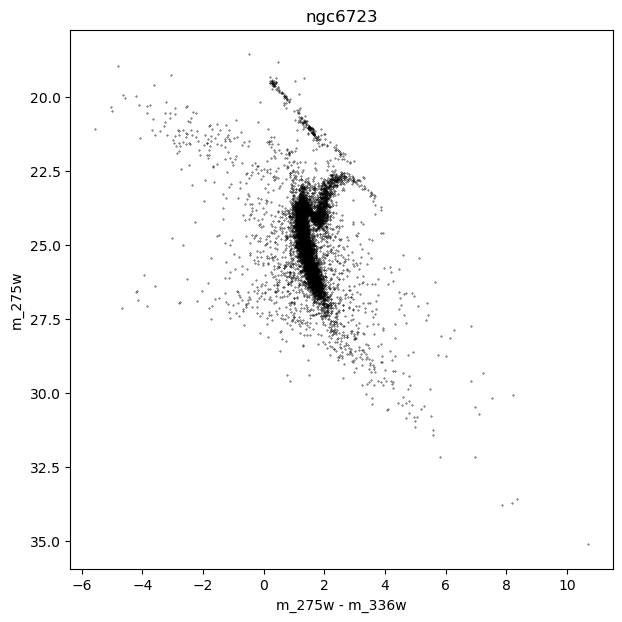

In [80]:
plt.figure(figsize = (7, 7))
plt.scatter(x = ngc6723_merge_df['diff_mag'],
            y = ngc6723_merge_df['mag_f275w'],
            s = 0.1,
            c = 'black')
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6723")
plt.gca().invert_yaxis()
plt.show()

### 백그라운드 제외, CMD 그리기

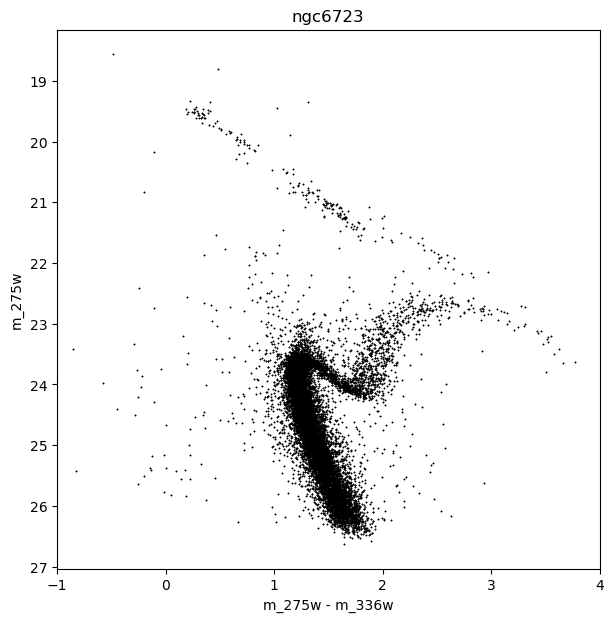

In [81]:
# total background의 값을 0 으로 가정

star_data_f275w_df['assumed_f275w'] = star_data_f275w_df['aperture_sum']  # total background = 0 
star_data_f275w_df['assumed_mag_f275w'] = zeropoint_f275w - (2.5*np.log10(abs(star_data_f275w_df['assumed_f275w'])/extime_f275w))

star_data_f336w_df['assumed_f336w'] = star_data_f336w_df['aperture_sum'] # total background = 0 
star_data_f336w_df['assumed_mag_f336w'] = zeropoint_f336w - (2.5*np.log10(abs(star_data_f336w_df['assumed_f336w'])/extime_f336w))

ngc0104_merge_df2 = pd.merge(star_data_f275w_df, star_data_f336w_df, how = 'inner', on = ['xcenter', 'ycenter'])

ngc0104_merge_df2['assumed_diff_mag'] = ngc0104_merge_df2['assumed_mag_f275w'] - ngc0104_merge_df2['assumed_mag_f336w']


plt.figure(figsize = (7, 7))
plt.scatter(x = ngc0104_merge_df2['assumed_diff_mag'],
            y = ngc0104_merge_df2['assumed_mag_f275w'],
            s = 0.1,
            color = 'black',
            marker = '*')
# plt.ylim(15.5, 24.5)
plt.xlim(-1, 4)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6723")
plt.gca().invert_yaxis()
plt.show()

### ngc6723 CMD

* HST UV Globular Cluster Survey ngc6723 연구 결과
  
<img src="image/ngc6723_CMD.png" width="600" height="600"/>

# 4. 데이터 셋에서 CMD 그리기

In [82]:
folder_path = '/Users/younghokim/astro/prj1_HUGS/HUGS/ngc6723'

In [83]:
os.listdir(folder_path)

['hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth2.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth3.txt',
 'hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth1.txt',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f438w_v1_stack-0061s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_cmd.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_rgb.png',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f275w_v1_stack-0734s.fits',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_multi_v1_rgb.tif',
 'hlsp_hugs_hst_wfc3-uvis_ngc6723_f336w_v1_stack-0313s.fits']

In [84]:
os.getcwd()

'/Users/younghokim/astro/prj1_HUGS'

In [85]:
col_names = [ 'X1',  'X2',  'X3',  'X4',  'X5',  'X6',  'X7',  'X8',  'X9', 'X10',
             'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
             'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
             'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37']

In [86]:
multi_df1 = pd.read_csv("HUGS/ngc6723/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc6723_multi_v1_catalog-meth1.txt", 
                        skiprows = 54, names = col_names,
                        header = None, delim_whitespace = True)
multi_df1.head()

X1         X2       X3       X4   X5      X6  X7  X8       X9  \
0  3333.6460  1845.7877 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
1  3225.0483  1883.5677 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
2  3671.1599  1933.1406 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
3  3687.4595  1962.2656 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   
4  3375.5171  1969.1639 -99.9999  99.9999  0.0  9.9999   0   0 -99.9999   

       X10  ...     X28     X29     X30  X31  X32  X33         X34        X35  \
0  99.9999  ...  0.0000  1.0000 -0.0014    1    1 -1.0  284.910909 -36.666862   
1  99.9999  ...  0.0000  1.0000 -0.0044    1    1 -1.0  284.912394 -36.666447   
2  99.9999  ...  0.0000  0.9999 -0.0011    1    1 -1.0  284.906293 -36.665904   
3  99.9999  ...  0.0000  0.9998  0.0200    1    1 -1.0  284.906070 -36.665585   
4  99.9999  ...  0.0034  0.9999  0.0458    2    1 -1.0  284.910336 -36.665509   

        X36  X37  
0  R0000001    1  
1  R0000002    1  
2  R0000003    1  
3  R0000004    1  
4  R0000005    1  

[5 rows x 37 columns]

In [87]:
multi_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67296 entries, 0 to 67295
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      67296 non-null  float64
 1   X2      67296 non-null  float64
 2   X3      67296 non-null  float64
 3   X4      67296 non-null  float64
 4   X5      67296 non-null  float64
 5   X6      67296 non-null  float64
 6   X7      67296 non-null  int64  
 7   X8      67296 non-null  int64  
 8   X9      67296 non-null  float64
 9   X10     67296 non-null  float64
 10  X11     67296 non-null  float64
 11  X12     67296 non-null  float64
 12  X13     67296 non-null  int64  
 13  X14     67296 non-null  int64  
 14  X15     67296 non-null  float64
 15  X16     67296 non-null  float64
 16  X17     67296 non-null  float64
 17  X18     67296 non-null  float64
 18  X19     67296 non-null  int64  
 19  X20     67296 non-null  int64  
 20  X21     67296 non-null  float64
 21  X22     67296 non-null  float64
 22

In [88]:
multi_df1.describe().round()

X1       X2       X3       X4       X5       X6       X7       X8  \
count  67296.0  67296.0  67296.0  67296.0  67296.0  67296.0  67296.0  67296.0   
mean    4960.0   5035.0    -18.0     34.0      0.0      3.0      2.0      1.0   
std     1321.0   1294.0     59.0     59.0      0.0      5.0      2.0      1.0   
min     1572.0   1840.0   -100.0      0.0      0.0     -1.0      0.0      0.0   
25%     4016.0   4086.0   -100.0      0.0      0.0     -0.0      0.0      0.0   
50%     4966.0   5032.0     22.0      0.0      0.0      0.0      2.0      1.0   
75%     5908.0   5989.0     25.0    100.0      1.0     10.0      4.0      1.0   
max     8366.0   8194.0     30.0   4937.0      1.0     10.0     99.0     99.0   

            X9      X10  ...      X27      X28      X29      X30      X31  \
count  67296.0  67296.0  ...  67296.0  67296.0  67296.0  67296.0  67296.0   
mean     -10.0     28.0  ...     20.0      1.0      1.0      0.0      4.0   
std       55.0     70.0  ...     12.0     10.0      0.0      2.0      5.0   
min     -100.0      0.0  ...   -100.0      0.0      0.0     -1.0      0.0   
25%     -100.0      0.0  ...     20.0      0.0      1.0     -0.0      3.0   
50%       21.0      0.0  ...     21.0      0.0      1.0      0.0      4.0   
75%       25.0    100.0  ...     23.0      0.0      1.0      0.0      4.0   
max       30.0   6858.0  ...     31.0    213.0      1.0     10.0     99.0   

           X32      X33      X34      X35      X37  
count  67296.0  67296.0  67296.0  67296.0  67296.0  
mean       1.0     39.0    285.0    -37.0      3.0  
std        5.0     48.0      0.0      0.0      1.0  
min        0.0     -1.0    285.0    -37.0      1.0  
25%        1.0     -1.0    285.0    -37.0      2.0  
50%        1.0     -1.0    285.0    -37.0      3.0  
75%        1.0     97.0    285.0    -37.0      3.0  
max       99.0    100.0    285.0    -37.0      6.0  

[8 rows x 36 columns]

In [89]:
print(multi_df1.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37'],
      dtype='object')


CMD 그릴 때 다시 활용해보고자 하는 컬럼

- X3 (f275w calibrated magnitude)
- X9 (f336w calibrated magnitude)

In [90]:
import copy

multi_df1_back_up = copy.deepcopy(multi_df1)

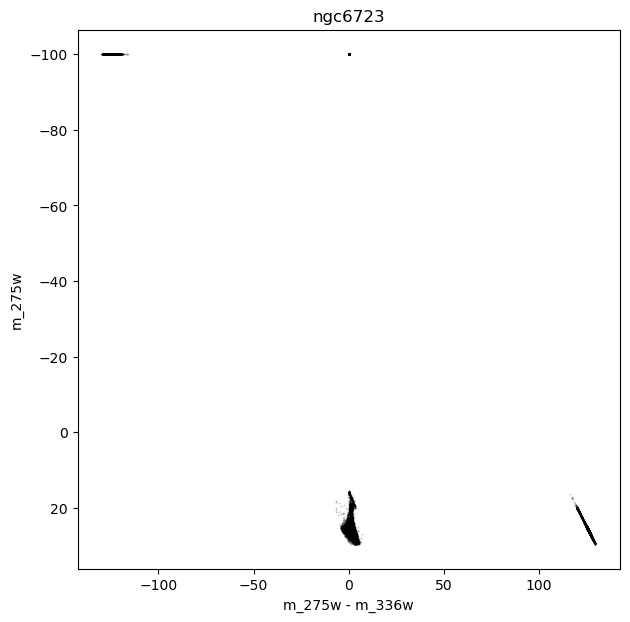

In [91]:
plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
# plt.ylim(15.5, 26)
# plt.xlim(-1, 3.5)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6723")
plt.gca().invert_yaxis()
plt.show()

In [92]:
# 백그라운 및 아웃라이어 부근을 제외하고 구상성단 색등급도 영역 부분으로 한정지어 플랏함

plt.figure(figsize = (7, 7))
plt.scatter(x = multi_df1.X3 - multi_df1.X9,
            y = multi_df1.X3,
            s = 0.1,
            c = 'Black',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6723")
plt.gca().invert_yaxis()
plt.show()

In [93]:
multi_df1["Colour(B-V)"] = multi_df1["X3"] - multi_df1["X9"]

# 백그라운드 및 불용값에 의한 연산 결과는 배제하고자 아래 조건으로 필터링을 실시
# -1 =< Colour(B-V) <= 3
# -10 =< X3 <= 30
filtered_df = multi_df1.query("`Colour(B-V)` >= -1 and `Colour(B-V)` <= 3.5 and X3 >= -10 and X3 <= 30")

In [94]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df.X3 - filtered_df.X9,
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df.X8,
            cmap = 'viridis',
            marker = '*',
            alpha = 0.2)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("m_275w - m_336w")
plt.ylabel("m_275w")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

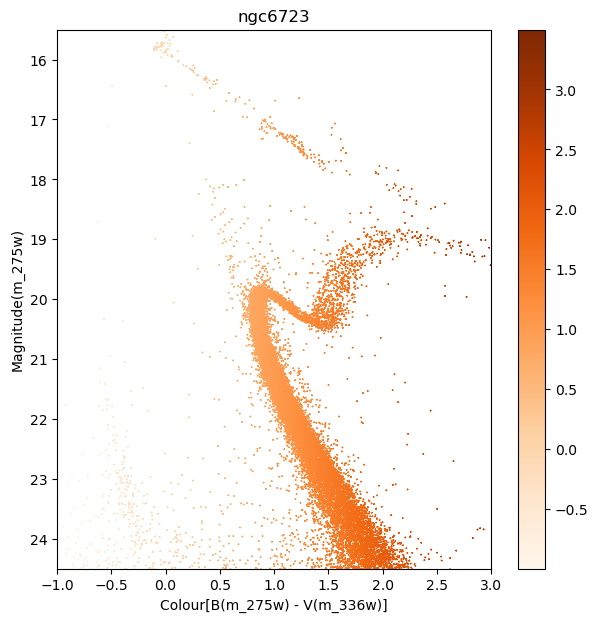

In [95]:
plt.figure(figsize = (7, 7))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'Oranges',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

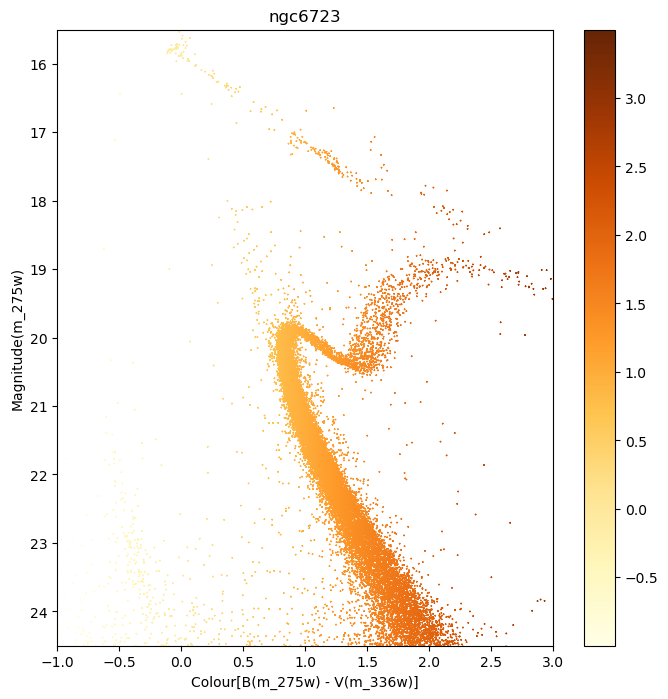

In [96]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

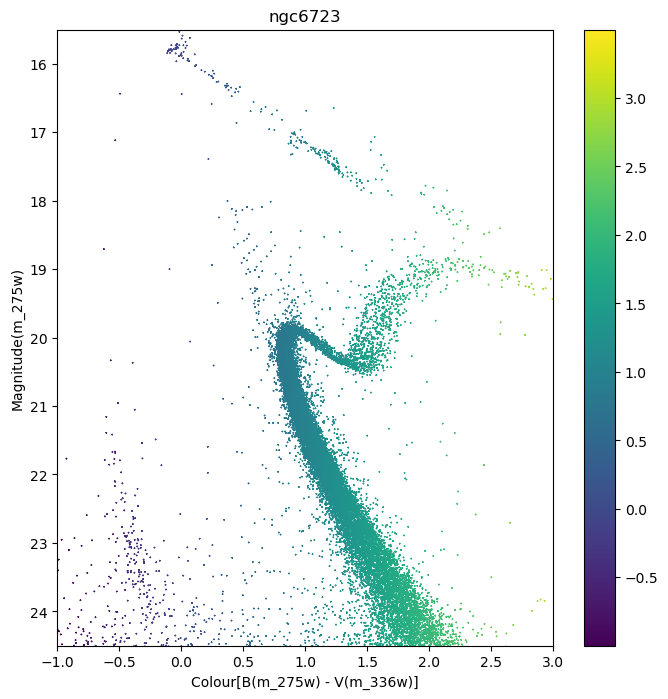

In [97]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'viridis',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

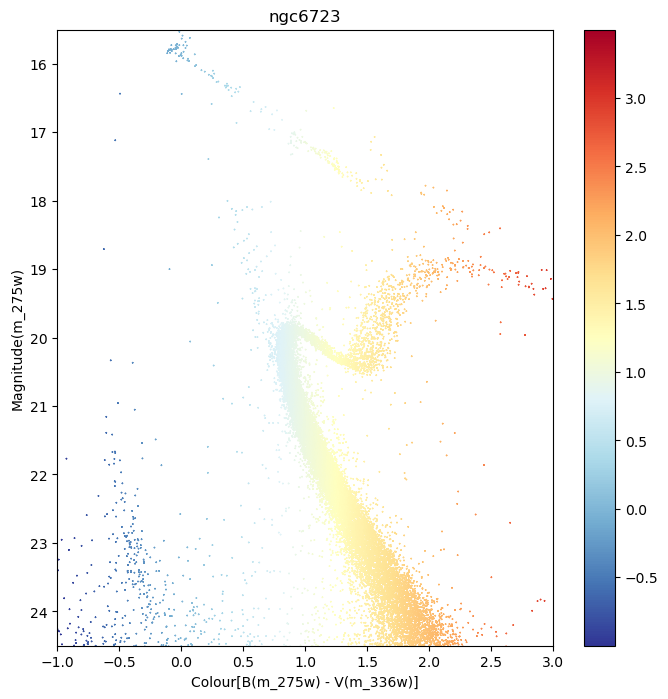

In [98]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()

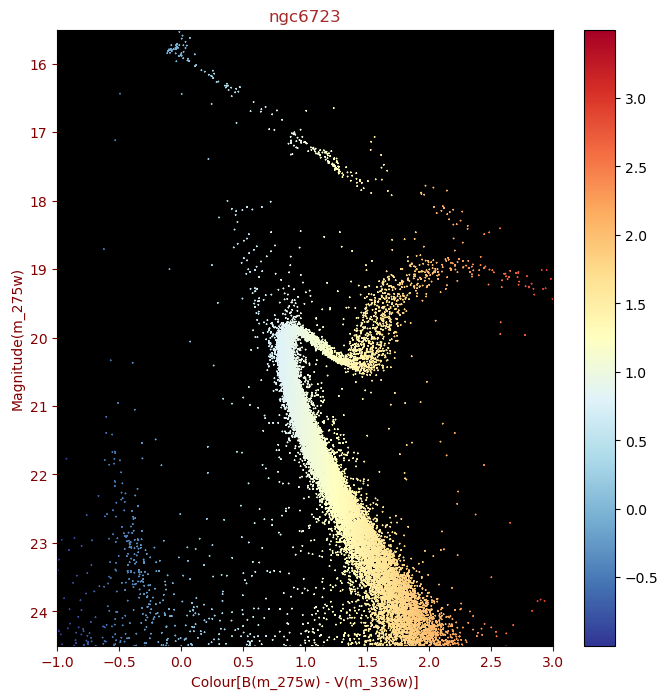

In [99]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'RdYlBu_r',
            marker = '*',
            alpha = 1)
plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)
plt.xlabel("Colour[B(m_275w) - V(m_336w)]")
plt.ylabel("Magnitude(m_275w)")
plt.title("ngc6723")
plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='maroon')
plt.title("ngc6723", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

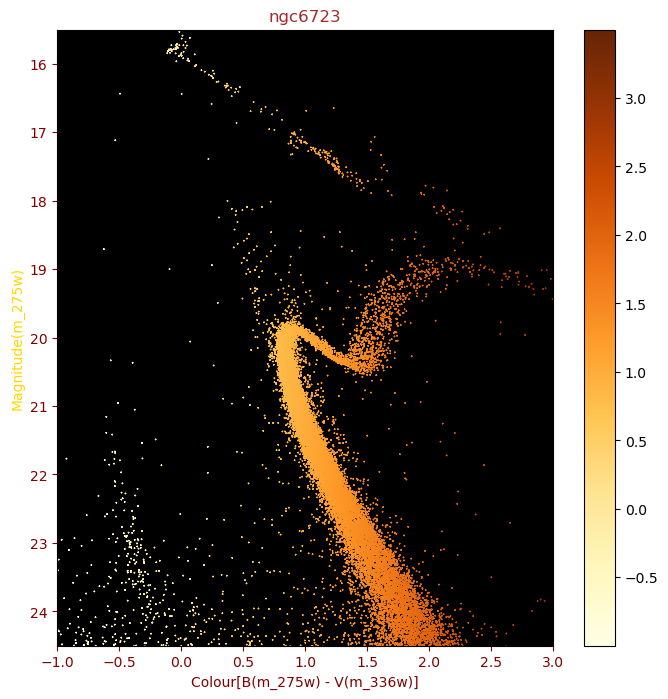

In [100]:
plt.figure(figsize = (8, 8))
plt.scatter(x = filtered_df["Colour(B-V)"],
            y = filtered_df.X3,
            s = 0.1,
            c = filtered_df["Colour(B-V)"],
            cmap = 'YlOrBr',
            marker = '*',
            alpha = 1)

plt.ylim(15.5, 24.5)
plt.xlim(-1, 3.0)

plt.colorbar()
plt.gca().invert_yaxis()

# 축의 배경색을 검은색으로 설정
plt.gca().set_facecolor('black')

# x축과 y축의 텍스트, 타이틀의 색상을 변경해야 배경과 대비
plt.xlabel("Colour[B(m_275w) - V(m_336w)]", color='maroon')
plt.ylabel("Magnitude(m_275w)", color='gold')
plt.title("ngc6723", color='Brown')
plt.tick_params(colors='maroon')  # 축의 틱 색상을 변경

plt.show()

* HST UV Globular Cluster Survey ngc6723 연구 결과
  
<img src="image/ngc6723_CMD.png" width="600" height="600"/>


**비교** 위키백과의 헤르츠스프룽-러셀 도표

<img src="./image/cmd.png" width="600" height="800"/>